In [1]:
import os
import sys

# change to upper dir to use all custom libs (won't be needed if run from main scripts)
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
import yadisk
import dotenv

dotenv.load_dotenv(dotenv.find_dotenv())
client = yadisk.Client(token=os.environ["YA_DISK_TOKEN"])

In [3]:
# os.mkdir('/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/test')

In [4]:
from scripts.helpers.yadisk_manager import download_model
import os

experiments = {
    # a minor problem with <2lang> token where language group was not passed correctly and initial token == <unk>
#     'nllb.ru-mhr.both_direction.upd_tokenizer': "/bs-diploma/experiments/kaggle/ru-mhr.both_direction.mari-parallel.nllb.upd_tokenizer.finally_fixed",

    'nllb.ru-mht.both_direction.old_tokenizer': '/bs-diploma/experiments/kaggle/ru-mhr.both_directions.mari-parallel.nllb.no_upd_tokenizer',
    'nllb.ru-mhr.both_direction.upd_tokenizer': "/bs-diploma/experiments/kaggle/ru-mhr.both_directions.mari-parallel-413k.nllb.no_upd_tokenizer.mhr_fixed",
    'nllb.ru-mhr.sing_direction.upd_tokenizer': "/bs-diploma/experiments/kaggle/ru-mhr.single_direction.mari-parallel-413k.nllb.update_tokenizer",
    
    
    # TODO: rename to upd_tokenizer on ya.disk
    'nllb.ru-tat.both_direction.upd_tokenizer': '/bs-diploma/experiments/kaggle/ru-tat.both_directions.ipsan.tatar-parallel-400k.nllb.upd_tokenizer',
    'nllb.ru-tat.both_direction.old_tokenizer': '/bs-diploma/experiments/kaggle/ru-tt.both_direction.ipsan.nllb.base_tokenizer',
#     'nllb.ru-tat.sing_direction.old_tokenizer': '',  # TODO: add
#     'nllb.tat-ru.sing_direction.old_tokenizer': '',  # TODO: add
    
}


# download_model(
#     client=client,
#     experiment=experiments['nllb.ru-mhr.both_direction.upd_tokenizer'],
#     folder='models',
#     checkpoint='last',
# )


experiments = {
    'ru-tat.both_directions.token_upd': '/bs-diploma/experiments/kaggle/ru-tat.both_directions.ipsan.tatar-parallel-400k.nllb.upd_tokenizer',
    'ru-tat.both_directions.no_token_upd': '/bs-diploma/experiments/kaggle/ru-tt.both_direction.ipsan.nllb.base_tokenizer',
    'ru-mhr.both_directions.no_token_upd': '/bs-diploma/experiments/kaggle/ru-mhr.both_directions.mari-parallel-413k.nllb.no_upd_tokenizer.mhr_fixed',
    'ru-mhr.both_directions.token_upd': '/bs-diploma/experiments/kaggle/ru-mhr.both_direction.mari-parallel.nllb.upd_tokenizer.finally_fixed',
}

# for checkpoint in ['last', '7200', '4200', '3600', '3000']:
#     for experiment in experiments:
#         direction = experiment.split('.')[0].replace('-', '_')
        
#         try:
#             download_model(
#                 client=client,
#                 experiment=experiments[experiment],
#                 folder=f'/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/{experiment}',
#                 checkpoint=checkpoint,
#             )
#             os.rename(f'/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/{experiment}/model',     f'/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/{experiment}/model.sft.{direction}.{checkpoint}')
#             os.rename(f'/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/{experiment}/tokenizer', f'/media/cutefluffyfox/TOSHIBA EXT/models/MT-vocab-tuning/{experiment}/tokenizer.sft.{direction}.{checkpoint}')
#         except Exception as ex:
#             print('Failed:', experiment, checkpoint)
#             print(ex)
#             print('=' * 100)
        
    
    

In [5]:
# ########################### TODO: DELETE THIS AFTER IT'S DONE ###################################
# from scripts.helpers.model_manager import NLLB200Model
# from tqdm import tqdm
# from scripts.benchmark.flores_dev import benchmark as benchmark_flores_dev


experiments = [
#     ('mhr_single_dir.token_upd_broken_bos.ru_mhr.last.txt', 'ru-mhr.single_direction.token_upd\model.sft.rus_mhr.9601.final'),
]
experiments += [
    (
        f'mhr_single_dir.token_upd_broken_bos.ru_mhr.{i}.txt', 
        f'ru-mhr.single_direction.token_upd\\model.sft.rus_mhr.{i}'
    ) 
    for i in range(0, 9600 + 1, 600)
]


# for broken in [True, False]:
#     for exp_name, exp_model_path in tqdm(experiments):
#         model = NLLB200Model.from_folder(
#             model_path=f'D:\\models\\MT-vocab-tuning\\{exp_model_path}', 
#             tokenizer_path=f'D:\\models\MT-vocab-tuning\\{exp_model_path.replace("model.", "tokenizer.")}', 
#             convert_to_float16=True, 
#             device='auto'
#         )
#         model.break_bos_token = broken
#         if broken:
#             exp_name += 'broken_bos.txt'
#         benchmark_flores_dev(model, 'ru-mhr', exp_name)
#         del model
#         NLLB200Model.cleanup()
    

# ########################### TODO: DELETE THIS AFTER IT'S DONE ###################################


In [6]:
from scripts.helpers.model_manager import NLLB200Model
from scripts.benchmark.flores_dev import benchmark as benchmark_flores_dev


# experiments = {
#     'ru-tat.both_directions.token_upd': '/bs-diploma/experiments/kaggle/ru-tat.both_directions.ipsan.tatar-parallel-400k.nllb.upd_tokenizer',
#     'ru-tat.both_directions.no_token_upd': '/bs-diploma/experiments/kaggle/ru-tt.both_direction.ipsan.nllb.base_tokenizer',
#     'ru-mhr.both_directions.no_token_upd': '/bs-diploma/experiments/kaggle/ru-mhr.both_directions.mari-parallel-413k.nllb.no_upd_tokenizer.mhr_fixed',
#     'ru-mhr.both_directions.token_upd': '/bs-diploma/experiments/kaggle/ru-mhr.both_direction.mari-parallel.nllb.upd_tokenizer.finally_fixed',
# }

# for checkpoint in ['last', '7200', '4200', '3600', '3000']:
#     for experiment in experiments:
#         direction = experiment.split('.')[0].replace('-', '_')
#         model_path = f'D:\models\MT-vocab-tuning\\{experiment}\model.sft.{direction}.{checkpoint}'
#         token_path = 'D:\\models\\MT-vocab-tuning\\' + experiment + '\\' + f'tokenizer.sft.{direction}.{checkpoint}'
# #         print(token_path)
# #         print(r'D:\models\MT-vocab-tuning\ru-tat.both_directions.token_upd\tokenizer.sft.ru_tat.last')
# #         print()
#         model = None
#         try:
#             print('Loading model:', experiment)
#             model = NLLB200Model.from_folder(
#                 model_path=model_path, 
#                 tokenizer_path=token_path, 
#                 convert_to_float16=True, 
#                 device='auto'
#             )
#             print('Evaluating model')
#             for broken in [False, True]:
#                 direction = direction.replace('_', '-')
#                 print('Break bos?:', broken)
#                 model.break_bos_token = broken
#                 exp_name = f"{experiment}.{checkpoint}.txt" # added checkpoint, RERUN (LONG TIME)
#                 if broken:
#                     exp_name += 'broken_bos.txt'
#                 print(exp_name, direction)
#                 benchmark_flores_dev(model, direction, exp_name)
#                 if 'both_directions' in experiment:
#                     reverse_dir = '-'.join(direction.split('-')[::-1])
#                     print(exp_name, reverse_dir)
#                     benchmark_flores_dev(model, reverse_dir, exp_name)
#         except Exception as ex:
#             print(ex)
#         if model is None:
#             continue
#         del model
#         NLLB200Model.cleanup()

        

In [7]:
# from scripts.helpers.model_manager import NLLB200Model

# model = NLLB200Model.from_folder(
# #     model_path='models/model', 
# #     tokenizer_path='models/tokenizer', 
#     model_path=r'D:\models\MT-vocab-tuning\ru-mhr.single_direction.token_upd\model.sft.rus_mhr.9601.final', 
#     tokenizer_path=r'D:\models\MT-vocab-tuning\ru-mhr.single_direction.token_upd\tokenizer.sft.rus_mhr.9601.final', 
#     convert_to_float16=True, 
#     device='auto'
# )

In [8]:
# model.break_bos_token = True
# trn_text = model.translate_single('один, два, три, четыре', 'ru', 'mhr')
# rus_text = model.translate_single(trn_text, 'mhr', 'ru')
# rus_text, trn_text

In [9]:
from scripts.benchmark.flores_dev import benchmark as benchmark_flores_dev

# benchmark_flores_dev(model, 'ru-mhr', 'mhr_single_dir.token_upd_broken_bos.ru_mhr.last.txt')
# benchmark_flores_dev(model, 'mhr-ru')

In [10]:
from scripts.helpers.metric_manager import BLEU, BLEURT, BertScore, CHRF, GoogleBLEU, FluencyRU

metrics = [
    BLEU(),
#     BLEURT(),
#     BertScore(),
    CHRF(),
#     FluencyRU(),
#     GoogleBLEU()
]

Using the latest cached version of the module from C:\Users\cutefluffyfox\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--bleu\9e0985c1200e367cce45605ce0ecb5ede079894e0f24f54613fca08eeb8aff76 (last modified on Tue Nov  5 05:51:14 2024) since it couldn't be found locally at evaluate-metric--bleu, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from C:\Users\cutefluffyfox\.cache\huggingface\modules\evaluate_modules\metrics\evaluate-metric--chrf\d244bab9383988714085a8dacc4871986d9f025398581c33d6b2ee22836b4069 (last modified on Tue Nov  5 05:54:58 2024) since it couldn't be found locally at evaluate-metric--chrf, or remotely on the Hugging Face Hub.


In [28]:
import pandas as pd
from scripts.helpers.path_manager import DataManager



dm = DataManager()
translations = []

# from 0 to last checkpoint
for exp_name, _ in experiments:
#     translations.append(dm.get_path('benchmark', 'ru-mhr', exp_name))
    translations.append(dm.get_path('benchmark', 'ru-mhr', exp_name + 'broken_bos.txt'))


# base experiments: both direction no/with token upd. FVT inference (with brokenbos)
translations += [
    
#     dm.get_path('benchmark', 'tat-ru', 'ru-tat.both_directions.token_upd.last.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'ru-tat.both_directions.token_upd.last.txtbroken_bos.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'ru-tat.both_directions.no_token_upd.last.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'ru-tat.both_directions.no_token_upd.last.txtbroken_bos.txt'),
    
#     dm.get_path('benchmark', 'ru-tat', 'ru-tat.both_directions.token_upd.last.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'ru-tat.both_directions.token_upd.last.txtbroken_bos.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'ru-tat.both_directions.no_token_upd.last.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'ru-tat.both_directions.no_token_upd.last.txtbroken_bos.txt'),
    
#     dm.get_path('benchmark', 'mhr-ru', 'ru-mhr.both_directions.token_upd.last.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'ru-mhr.both_directions.token_upd.last.txtbroken_bos.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'ru-mhr.both_directions.no_token_upd.last.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'ru-mhr.both_directions.no_token_upd.last.txtbroken_bos.txt'),
    
#     dm.get_path('benchmark', 'ru-mhr', 'ru-mhr.both_directions.token_upd.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'ru-mhr.both_directions.token_upd.last.txtbroken_bos.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'ru-mhr.both_directions.no_token_upd.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'ru-mhr.both_directions.no_token_upd.last.txtbroken_bos.txt'),
    
]
    

translations += [
#     dm.get_path('benchmark', 'mhr-ru', 'mhr_both_dir.token_upd.mhr_ru.last.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'mhr_both_dir.token_upd_broken.mhr_ru.last.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'mhr_both_dir.token_upd_broken.mhr_ru.7200.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'mhr_both_dir.old_tokenizer.mhr_ru.last.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'nllb200.mhr_ru.txt'),
#     dm.get_path('benchmark', 'mhr-ru', 'madlad400.mhr_ru.txt'),

#     dm.get_path('benchmark', 'ru-mhr', 'mhr_both_dir.token_upd.ru_mhr.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'mhr_single_dir.token_upd_broken_bos.ru_mhr.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'mhr_single_dir.token_upd.ru_mhr.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'mhr_both_dir.token_upd_broken.ru_mhr.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'mhr_both_dir.token_upd_broken.ru_mhr.7200.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'mhr_both_dir.old_tokenizer.ru_mhr.last.txt'),
#     dm.get_path('benchmark', 'ru-mhr', 'madlad400.ru_mhr.txt'),

    
#     dm.get_path('benchmark', 'tat-ru', 'tat_both_dir.no_token_upd.tat_ru.last.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'tat_both_dir.token_upd.tat_ru.last.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'nllb200.tat_ru.txt'),
#     dm.get_path('benchmark', 'tat-ru', 'madlad400.tat_ru.txt'),

#     dm.get_path('benchmark', 'ru-tat', 'tat_both_dir.no_token_upd.ru_tat.last.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'tat_both_dir.token_upd.ru_tat.last.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'nllb200.ru_tat.txt'),
#     dm.get_path('benchmark', 'ru-tat', 'madlad400.ru_tat.txt'),

#     dm.get_path('benchmark', 'kaz-ru', 'nllb200.kaz_ru.txt'),
#     dm.get_path('benchmark', 'kaz-ru', 'madlad400.kaz_ru.txt'),

    
#     dm.get_path('benchmark', 'ru-kaz', 'nllb200.ru_kaz.txt'),
#     dm.get_path('benchmark', 'ru-kaz', 'madlad400.ru_kaz.txt'),
]


from collections import defaultdict
prev_dir = ''
graph = defaultdict(list)
for trans in translations:
    direction = trans.split('benchmark')[-1].replace('\\', '/').strip('/').split('/')[0]
    if prev_dir != direction:
        print('\n\n\n')
        prev_dir = direction
    
    print('==========', trans.split('benchmark')[-1], '==========')
    src_lang, dst_lang = direction.split('-')
    for metric in metrics:
        if not metric.lang_is_supported(metric):
            continue
        
        with open(trans, 'r', encoding='UTF-8') as file:
            res = [eval(line.strip()) for line in file.readlines()]
        df = pd.DataFrame(res)
        if dst_lang == 'ru' and 'ru' not in df.columns and 'rus' in df.columns:
            dst_lang = 'rus'
        res_trans, res_ref = df['translation'].to_list(), df[dst_lang].to_list()
        
        val = metric.metric_name, ':', metric(
            sources=None,
            targets=res_ref,
            translations=res_trans,
            lang=dst_lang,
            bootstrap=-1,
            confidence=0.95,
        )
        idx = trans.split('token_upd_broken_bos')[-1].split('.')[2]
        if metric.metric_name == 'bleu':
            graph['indexes'].append(int(idx))
            graph['BLEU'].append(val[-1] * 100)
            print(idx, ':', val[-1])
        print(metric.metric_name, ':', metric(
            sources=None,
            targets=res_ref,
            translations=res_trans,
            lang=dst_lang,
            bootstrap=-1,
            confidence=0.95,
        ))





========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.0.txtbroken_bos.txt ==========
0 : 0.005716640337553829
bleu : 0.005716640337553829
chrf : 1.2839550835564009
========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.600.txtbroken_bos.txt ==========
600 : 0.007386448019093828
bleu : 0.007386448019093828
chrf : 13.143818654291369
========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.1200.txtbroken_bos.txt ==========
1200 : 0.03885407759863507
bleu : 0.03885407759863507
chrf : 29.95615943834551
========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.1800.txtbroken_bos.txt ==========
1800 : 0.048914133215503135
bleu : 0.048914133215503135
chrf : 33.63659305167291
========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.2400.txtbroken_bos.txt ==========
2400 : 0.053959997920511
bleu : 0.053959997920511
chrf : 33.502075899545645
========== \ru-mhr\mhr_single_dir.token_upd_broken_bos.ru_mhr.3000.txtbroken_bos.txt ==========
3000 : 0.05608688569409978
b

Text(0, 0.5, 'BLEU')

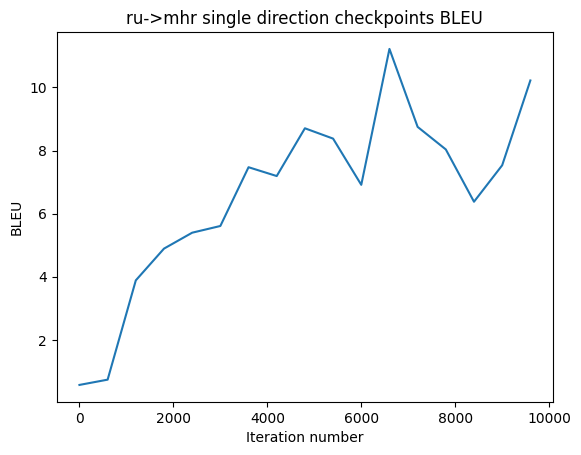

In [43]:
import matplotlib.pyplot as plt

plt.plot(graph['indexes'], graph['BLEU'], label="Training Loss")
plt.title('ru->mhr single direction checkpoints BLEU')
plt.xlabel("Iteration number")
plt.ylabel("BLEU")

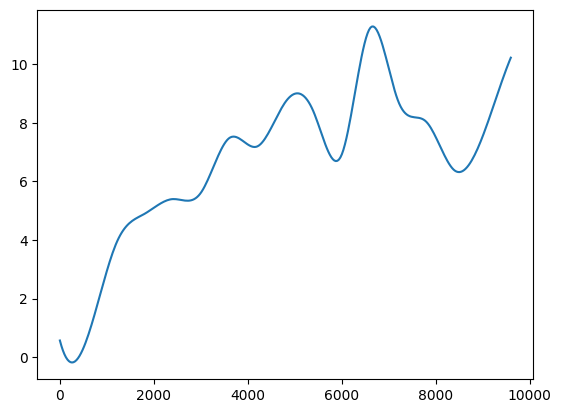

In [37]:
# from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np


# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(min(graph['indexes']), max(graph['indexes']), 300) 

spl = make_interp_spline(graph['indexes'], graph['BLEU'], k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

In [30]:
# with open('C:\\Users\\cutefluffyfox\\PycharmProjects\\MT-vocab-tuning\\data\\benchmark\\mhr-ru\\nllb200.mhr_ru.txt', 'r', encoding='UTF-8') as file:
#     print(eval(file.readlines()[942])['translation'])